<a href="https://colab.research.google.com/github/socd06/openvino_colab/blob/master/emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Setup Project files

In [2]:
cd /content

/content


In [3]:
!git clone "https://github.com/socd06/openvino_colab.git"

Cloning into 'openvino_colab'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 55 (delta 8), reused 46 (delta 6), pack-reused 0
Unpacking objects: 100% (55/55), done.


# OpenVINO Installation

In [4]:
cd openvino_colab/

/content/openvino_colab


In [5]:
!python openvino_initialization_script.py

--2020-02-28 02:30:48--  https://storage.googleapis.com/open_vino_public/l_openvino_toolkit_p_2020.1.023.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 508213676 (485M) [application/x-compressed]
Saving to: ‘l_openvino_toolkit_p_2020.1.023.tgz’

l_openvino_toolkit_ 100%[===================>] 484.67M  47.8MB/s    in 12s     

2020-02-28 02:31:01 (41.6 MB/s) - ‘l_openvino_toolkit_p_2020.1.023.tgz’ saved [508213676/508213676]


This script installs the following OpenVINO 3rd-party dependencies:
  1. GTK+, FFmpeg and GStreamer libraries used by OpenCV
  2. libusb library required for Myriad plugin for Inference Engine
  3. build dependencies for OpenVINO samples

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvi

# Setting up environment paths

In [0]:
install_dir = '/opt/intel/openvino/'
model_optimizer = '/opt/intel/openvino/deployment_tools/model_optimizer/'
deployment_tools = '/opt/intel/openvino/deployment_tools/'
model_zoo = '/opt/intel/openvino/deployment_tools/open_model_zoo/'


# Downloading Model

Emotions Recognition model



*   [Documentation](https://docs.openvinotoolkit.org/2020.1/_models_intel_emotions_recognition_retail_0003_description_emotions_recognition_retail_0003.html#outputs)

In [7]:
!python $model_zoo'tools/downloader/'downloader.py --name emotions-recognition-retail-0003 --precisions FP32-INT8 -o /content/openvino_colab/models

################|| Downloading models ||################

========== Downloading /content/openvino_colab/models/intel/emotions-recognition-retail-0003/FP32-INT8/emotions-recognition-retail-0003.xml
... 100%, 100 KB, 362 KB/s, 0 seconds passed

========== Downloading /content/openvino_colab/models/intel/emotions-recognition-retail-0003/FP32-INT8/emotions-recognition-retail-0003.bin
... 100%, 9714 KB, 161445 KB/s, 0 seconds passed

################|| Post-processing ||################



# Running Inference

In [47]:
cd /content/openvino_colab/demo_files/

/content/openvino_colab/demo_files


In [52]:
!source /opt/intel/openvino/bin/setupvars.sh && python app.py -i "/content/openvino_colab/img/anger2.jpg" -t "EMO" -m "/content/openvino_colab/models/intel/emotions-recognition-retail-0003/FP32-INT8/emotions-recognition-retail-0003.xml" 

[setupvars.sh] OpenVINO environment initialized
Preprocessing...
...Success
Handling emotion recognition model...
[0.23012477 0.16335657 0.07618817 0.35184848 0.17848207]
3
...Success
surprise
Success


# Output

In [55]:
cd /content/openvino_colab/demo_files/outputs/

/content/openvino_colab/demo_files/outputs


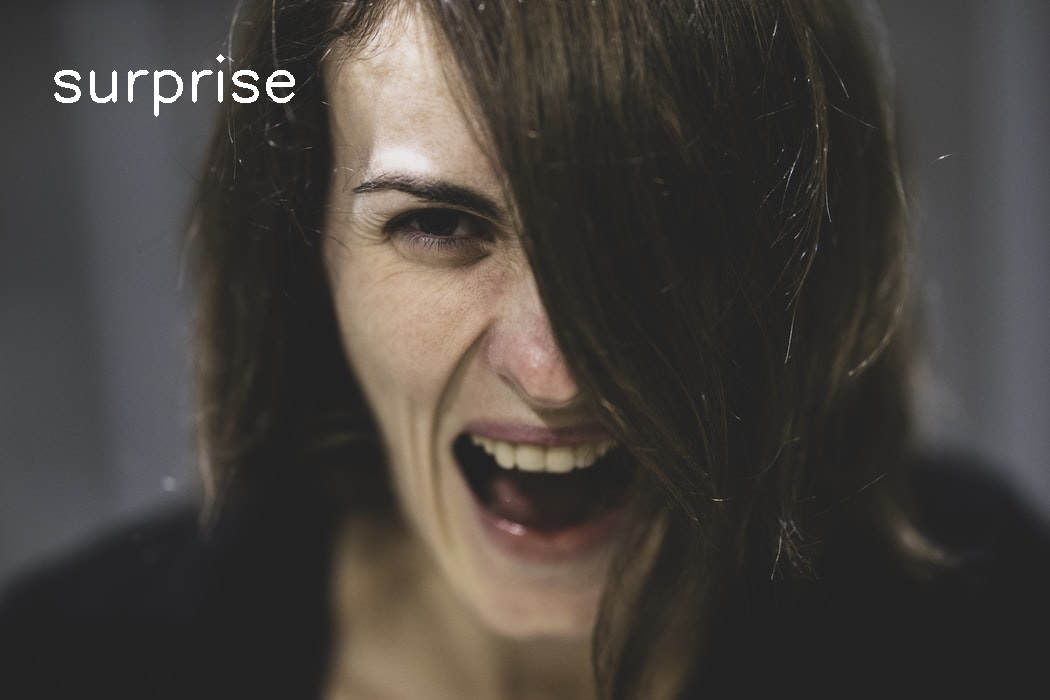

In [57]:

from google.colab.patches import cv2_imshow
import cv2


img = cv2.imread("EMO-output.png", cv2.IMREAD_UNCHANGED)
cv2_imshow(img)